<a href="https://colab.research.google.com/github/Motrik/FRAUD-DETECTION---homework-3/blob/master/HOMEWORK_3_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train a model with pandas, seaborn and scikit-learn to create a fraud detection classifier.

Instructions:

Build a **logistic regression model using Scikit-learn to predict fraudulent transactions** by training it on this kaggle dataset.


Before you train the model, create at least 1 visualization of the data using the seaborn library of your choice. This should be submitted as a ""jupyter notebook". 

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

#Siraj:
import sklearn

import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random


  
# Download the data and store it
!wget -O creditcard.csv https://www.dropbox.com/s/f1t8n74zx25biq3/creditcard.csv?dl=0
# Read the CSV file
data = pd.read_csv('creditcard.csv')
data = data.sample(frac=.1).reset_index(drop = True)
#data.info()

--2019-09-16 14:25:25--  https://www.dropbox.com/s/f1t8n74zx25biq3/creditcard.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f1t8n74zx25biq3/creditcard.csv [following]
--2019-09-16 14:25:26--  https://www.dropbox.com/s/raw/f1t8n74zx25biq3/creditcard.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc008c3f65f1fa2dd49f8c4492d2.dl.dropboxusercontent.com/cd/0/inline/Aoqs-N-ay1drtsoFGRNklFtSb3Ufh26QFIFzjPPaDCYrAQrojrJQKY3FkJYaZbqA53BeN0cM4Rsdjkwcljavwci8kEhB8c2SW1gF9_KC8h6cG0vx6sazd8BdnInVKEwZutk/file# [following]
--2019-09-16 14:25:26--  https://uc008c3f65f1fa2dd49f8c4492d2.dl.dropboxusercontent.com/cd/0/inline/Aoqs-N-ay1drtsoFGRNklFtSb3Ufh26QFIFzjPPaDCYrAQrojrJQKY3FkJYaZbqA53BeN0cM4Rsdjkwcljavwci8kEhB8c2SW1gF9_K

In [0]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94941.956532,0.007809,-0.019403,-0.002130,0.005163,-0.008438,-0.005988,0.002822,0.000684,-0.003689,-0.005834,-0.008254,-0.004772,0.002761,0.006301,0.004529,-0.000973,0.001256,0.004878,0.005814,-0.000525,-0.007022,0.002647,0.008683,-0.001417,-0.006610,0.003049,0.000867,-0.002180,90.267480,0.001545
std,47546.113350,1.956717,1.673850,1.508222,1.409959,1.384176,1.333389,1.221286,1.197248,1.088153,1.056301,1.021502,0.996657,0.996932,0.945753,0.913729,0.874376,0.836117,0.830370,0.816641,0.795937,0.690254,0.723716,0.622013,0.606256,0.521089,0.483196,0.384232,0.287879,258.174022,0.039275
min,0.000000,-37.558067,-44.639245,-30.177317,-5.600607,-35.182120,-21.248752,-31.197329,-39.688571,-9.462573,-22.187089,-4.453853,-17.769143,-3.668705,-19.214325,-4.005558,-12.675269,-22.608868,-9.498746,-4.619034,-28.009635,-18.632919,-6.320710,-14.767079,-2.836627,-4.547278,-1.664130,-9.390980,-8.314029,0.000000,0.000000
25%,54317.000000,-0.913853,-0.620267,-0.893358,-0.842274,-0.698301,-0.769369,-0.554442,-0.206998,-0.640204,-0.537881,-0.773767,-0.410672,-0.649377,-0.422623,-0.569142,-0.464772,-0.477586,-0.488239,-0.449111,-0.211376,-0.231570,-0.543722,-0.160226,-0.352908,-0.323325,-0.325999,-0.071604,-0.052536,5.990000,0.000000
50%,85050.000000,0.029639,0.050994,0.177167,-0.005028,-0.058517,-0.280174,0.040740,0.021521,-0.052334,-0.088964,-0.041431,0.138342,-0.013508,0.047513,0.055334,0.069225,-0.066776,-0.005445,0.005276,-0.062572,-0.028666,0.010241,-0.010321,0.039394,0.007387,-0.047526,0.000881,0.011159,22.000000,0.000000
75%,139389.000000,1.319065,0.798155,1.029475,0.744308,0.601466,0.387308,0.566388,0.324273,0.599255,0.449678,0.738088,0.619588,0.660625,0.495634,0.652649,0.522214,0.398512,0.505331,0.461573,0.133129,0.186678,0.528700,0.150110,0.434997,0.343802,0.245545,0.089235,0.079268,79.000000,0.000000
max,172788.000000,2.422508,16.497472,3.940337,10.822399,31.457046,21.550496,36.877368,12.431140,9.077107,13.164571,12.018913,4.202685,4.316156,6.558272,5.667667,8.289890,7.611862,3.864228,5.228342,26.237391,17.333779,8.272233,18.364472,3.979637,5.473885,3.517346,8.088549,13.013546,12910.930000,1.000000


In [0]:


fraud = data.loc[data['Class'] == 1] # Please locate the Class Zero
non_fraud = data.loc[data['Class'] == 0]

print(len(fraud)) # How many classified as fraud
print(len(non_fraud))

44
28437


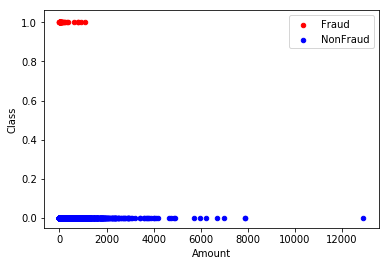

In [0]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Red', label='Fraud')
non_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='NonFraud', ax=ax)
plt.show()

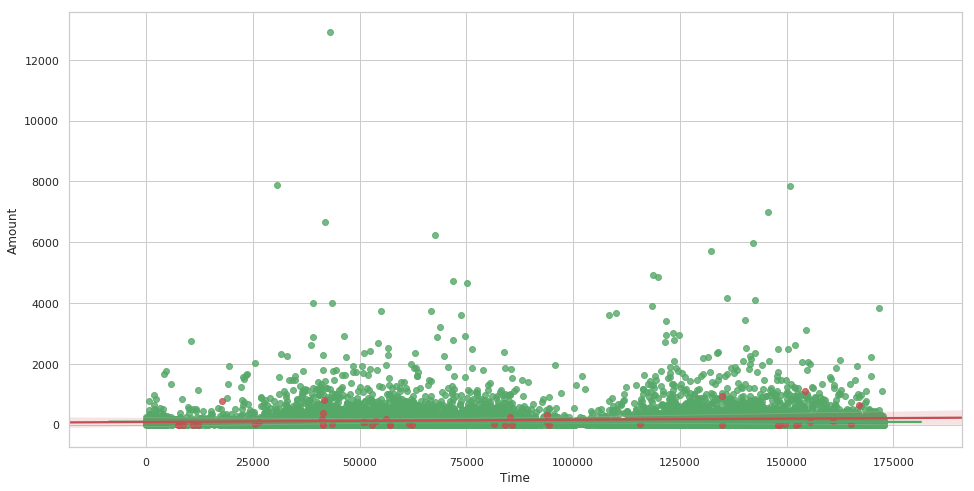

In [0]:
import seaborn as sns

#Aesthetics
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

sns.regplot(x="Time",
 y="Amount",
 data=non_fraud, color="g", ax=ax)
sns.regplot(x="Time",
 y="Amount",
 data=fraud, color="r", ax=ax)


In [0]:
#Siraj

#  MACHINE LEARNING

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data['Class']
 
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('Score: ', logistic.score(X_test,y_test))

y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9990972013241047
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9956
           1       0.70      0.54      0.61        13

    accuracy                           1.00      9969
   macro avg       0.85      0.77      0.80      9969
weighted avg       1.00      1.00      1.00      9969



In [0]:
# statistically summary of all the columns
print(data.describe())


                Time            V1  ...        Amount         Class
count   28481.000000  28481.000000  ...  28481.000000  28481.000000
mean    94941.956532      0.007809  ...     90.267480      0.001545
std     47546.113350      1.956717  ...    258.174022      0.039275
min         0.000000    -37.558067  ...      0.000000      0.000000
25%     54317.000000     -0.913853  ...      5.990000      0.000000
50%     85050.000000      0.029639  ...     22.000000      0.000000
75%    139389.000000      1.319065  ...     79.000000      0.000000
max    172788.000000      2.422508  ...  12910.930000      1.000000

[8 rows x 31 columns]


In [0]:
# Only use the 'Amount' and 'V1', ..., 'V28' features (not CLASS nor TIME)
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# X(features) and y(target variable)
X = data[features]
y = data[target]

In [0]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    Notice that some of the variables have a wide range of values (like the Amount variable).
    In order to get all variables in an equivalent range, we subtract the mean and divide by the standard deviation such that the distribution of the values is normalized:
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [0]:
# Define the model - Logistic Regression Model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
# StratisfiedShuffleSplit makes sure that the Class variable has roughly the same distribution in both the train set and the test set.
# The random state specification makes sure that the result is deterministic: in other words, we will get the same results if we would run the analysis again.
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)


# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14219
           1       0.80      0.73      0.76        22

    accuracy                           1.00     14241
   macro avg       0.90      0.86      0.88     14241
weighted avg       1.00      1.00      1.00     14241



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


This is actually a great result! The 0 classes (transactions without fraud) are predicted with 100% precision and recall. It has some issues with detecting the 1 classes (transactions which are fraudulent). It can predict fraud with 88% precision. This means that 12% of the transactions which are fraudulent remain undetected by the system. But, 88% is still quite good!